# Logistic Regression

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
def readData(filename):
        data = pd.read_csv(filename)
        print("First 5 data: \n", data.head())
        print("Last 5 data: \n", data.tail())
        return data

In [18]:
def shapiroAllData(X):
    
    for i in X:
        stats, p = shapiro(X[i])
        if p > 0.05:
            print('Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)' + "--> "+i)
        else:
            print('Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)'+ "--> "+i)

### Veri Okuma

In [4]:
df = readData("hmelq.csv")

First 5 data: 
    bad   loan   mortdue     value   reason  job   yoj  derog  delinq   clage  \
0    0  81200   18834.0  108355.0  HomeImp  NaN  28.0    0.0     0.0  139.14   
1    0  12600  103960.0  127384.0  DebtCon  NaN   2.0    0.0     0.0  129.02   
2    0  18000   46865.0   61266.0  DebtCon  NaN   5.0    0.0     0.0  102.59   
3    0  10300   57676.0   71027.0  DebtCon  NaN  19.0    0.0     0.0  157.52   
4    0   9400   56508.0   78358.0  DebtCon  NaN  17.0    0.0     0.0  141.93   

   ninq  clno  debtinc  
0   0.0  14.0   34.042  
1   0.0  25.0   34.479  
2   2.0   9.0   26.354  
3   1.0  11.0   33.992  
4   0.0  11.0   32.327  
Last 5 data: 
       bad   loan   mortdue    value   reason   job  yoj  derog  delinq  \
3571    1   8400   31800.0  72000.0  DebtCon  Self  NaN    0.0     2.0   
3572    1  21600  154991.0      NaN  DebtCon  Self  NaN    2.0     4.0   
3573    1  24000   35000.0      NaN  DebtCon  Self  3.0    1.0     0.0   
3574    1  10000       NaN  25010.0  HomeI

In [6]:
data = pd.read_csv("hmelq.csv")
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [7]:
data.isnull().values.any()
data.isnull().sum()

bad          0
loan         0
mortdue    314
value       64
reason     147
job        167
yoj        312
derog      427
delinq     351
clage      179
ninq       303
clno       133
debtinc    767
dtype: int64

In [295]:
data.select_dtypes(include=['float64','int64']).T

,0,1,2,3,4,5,6,7,8,9,...,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575
bad,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.00,1.00,1.0,1.00,1.0,1.00,1.000,1.0,1.00,1.00
loan,81200.000,12600.000,18000.000,10300.000,9400.000,17200.000,82200.000,6200.000,17400.000,8900.000,...,5000.00,36500.00,7500.0,25000.00,23000.0,8400.00,21600.000,24000.0,10000.00,5900.00
mortdue,18834.000,103960.000,46865.000,57676.000,56508.000,39316.000,23197.000,45356.000,113890.000,63342.000,...,6000.00,84978.00,39600.0,59841.00,163805.0,31800.00,154991.000,35000.0,NaN,NaN
value,108355.000,127384.000,61266.000,71027.000,78358.000,66978.000,110481.000,82054.000,135146.000,78275.000,...,38575.00,125000.00,42000.0,108620.00,216500.0,72000.00,NaN,NaN,25010.00,28000.00
yoj,28.000,2.000,5.000,19.000,17.000,4.000,26.000,2.000,16.000,19.000,...,7.00,10.00,1.0,20.00,3.5,NaN,NaN,3.0,5.00,1.00
derog,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.00,0.00,0.0,0.00,NaN,0.00,2.000,1.0,0.00,2.00
delinq,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,...,1.00,1.00,0.0,0.00,NaN,2.00,4.000,0.0,3.00,1.00
clage,139.140,129.020,102.590,157.520,141.930,99.990,127.770,201.330,174.100,162.200,...,335.03,213.07,47.7,101.47,NaN,187.27,165.600,177.5,326.13,36.77
ninq,0.000,0.000,2.000,1.000,0.000,1.000,0.000,4.000,1.000,1.000,...,3.00,0.00,1.0,0.00,NaN,1.00,0.000,0.0,4.00,1.00
clno,14.000,25.000,9.000,11.000,11.000,10.000,14.000,29.000,17.000,11.000,...,42.00,64.00,15.0,4.00,NaN,21.00,43.000,16.0,17.00,8.00


In [296]:
data.select_dtypes(include=["object"]).T

,0,1,2,3,4,5,6,7,8,9,...,3566,3567,3568,3569,3570,3571,3572,3573,3574,3575
reason,HomeImp,DebtCon,DebtCon,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon,DebtCon,DebtCon,...,HomeImp,DebtCon,DebtCon,NaN,HomeImp,DebtCon,DebtCon,DebtCon,HomeImp,DebtCon
job,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Self,Self,Self,Self,Self,Self,Self,Self,Self,Self


In [297]:
data.shape

(3576, 13)

In [298]:
data = data.dropna()

In [299]:
data.shape

(2018, 13)

1558 data silindi

##### iyi - kötü değerini Yê diğerlerini X e atama 

In [10]:
y = data["bad"]

In [11]:
data_ = pd.get_dummies(data)
X = data_.drop(["bad"], axis=1)

In [12]:
from scipy.stats import shapiro

In [19]:
shapiroAllData(X)

Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> loan
Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)--> mortdue
Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)--> value
Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)--> yoj
Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)--> derog
Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)--> delinq
Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)--> clage
Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)--> ninq
Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)--> clno
Örneklem Normal (Gaussian) Dağılımdan gelmektedir (Fail to Reject H0)--> debtinc
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> reason_DebtCon
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir (reject H0)--> reason_HomeImp
Örneklem Normal (Gaussian) Dağılımdan gelmemektedir 

In [304]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bad             2018 non-null   int64  
 1   loan            2018 non-null   int64  
 2   mortdue         2018 non-null   float64
 3   value           2018 non-null   float64
 4   yoj             2018 non-null   float64
 5   derog           2018 non-null   float64
 6   delinq          2018 non-null   float64
 7   clage           2018 non-null   float64
 8   ninq            2018 non-null   float64
 9   clno            2018 non-null   float64
 10  debtinc         2018 non-null   float64
 11  reason_DebtCon  2018 non-null   uint8  
 12  reason_HomeImp  2018 non-null   uint8  
 13  job_Mgr         2018 non-null   uint8  
 14  job_Office      2018 non-null   uint8  
 15  job_Other       2018 non-null   uint8  
 16  job_ProfEx      2018 non-null   uint8  
 17  job_Sales       2018 non-null  

## Stats Model

In [305]:
y.dtype

dtype('int64')

X dataframe'inde object typede veri olursa - *Pandas data cast to numpy dtype of object. Check input data with np.asarray(data) - hatası veriyor*. Önce kategorikler dummy yapılır.

In [306]:
logit = sm.Logit(y,X)

In [307]:
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.228362
         Iterations 8


In [308]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2001
Method:                           MLE   Df Model:                           16
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.2346
Time:                        21:07:03   Log-Likelihood:                -460.84
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 1.039e-50
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
loan            -1.73e-05   1.05e-05     -1.640      0.101    -3.8e-05    3.37e-06
mortdue        -4.777e-06   4.76e-06     -1.004      0.315   -1.41e-05    4.55e-06
value           4.089e-06   4.06e-06      1.006      0.314   -3.87e-06    1.21e-05
yoj               -0.0109      0.013     -0.854      0.393      -0.036       0.014
derog              0.5708      0.130      4.382      0.000       0.315       0.826
delinq             0.7985      0.095      8.448      0.000       0.613       0.984
clage             -0.0046      0.001     -3.354      0.001      -0.007      -0.002
ninq               0.1119      0.049      2.303      0.021       0.017       0.207
clno              -0.0286      0.011     -2.627      0.009      -0.050      -0.007
debtinc            0.1143      0.014      8.222      0.000       0.087       0.142
reason_DebtCon    -3.7938   1.26e+07  -3.02e-07      1.000   -2.46e+07    2.46e+07
reason_HomeImp    -3.8593   1.26e+07  -3.07e-07      1.000   -2.46e+07    2.46e+07
job_Mgr           -1.4722   1.26e+07  -1.17e-07      1.000   -2.46e+07    2.46e+07
job_Office        -2.0716   1.26e+07  -1.65e-07      1.000   -2.46e+07    2.46e+07
job_Other         -1.5260   1.26e+07  -1.22e-07      1.000   -2.46e+07    2.46e+07
job_ProfEx        -1.5377   1.26e+07  -1.22e-07      1.000   -2.46e+07    2.46e+07
job_Sales         -0.2487   1.26e+07  -1.98e-08      1.000   -2.46e+07    2.46e+07
job_Self          -0.7970   1.26e+07  -6.35e-08      1.000   -2.46e+07    2.46e+07
==================================================================================
"""

-
-

## Scikit-Learn

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X,y)

In [312]:
loj_model

LogisticRegression(solver='liblinear')

In [313]:
loj_model.intercept_

array([-0.0086955])

In [314]:
loj_model.coef_

array([[-2.83163861e-05, -4.89389252e-06, -1.61418650e-06,
        -3.31738339e-02,  2.01031589e-02,  3.64166548e-02,
        -7.28657597e-03,  1.07646587e-02, -2.92930551e-02,
         2.39167894e-02, -5.62310945e-03, -3.07239212e-03,
        -5.37405428e-05, -4.14770080e-03, -5.33142381e-03,
        -1.64484468e-03,  1.14343216e-03,  1.33877610e-03]])

## Tahmin Model Tuning

In [315]:
y_pred = loj_model.predict(X)

In [316]:
confusion_matrix(y, y_pred)

array([[1835,    5],
       [ 178,    0]], dtype=int64)

In [317]:
accuracy_score(y, y_pred)

0.9093161546085233

In [318]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.00      0.00      0.00       178

    accuracy                           0.91      2018
   macro avg       0.46      0.50      0.48      2018
weighted avg       0.83      0.91      0.87      2018



##### Probabilities

In [319]:
loj_model.predict(X)[695:710]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [320]:
loj_model.predict_proba(X)[695:710][:,0:2]

array([[0.76380766, 0.23619234],
       [0.93986053, 0.06013947],
       [0.46583557, 0.53416443],
       [0.84072505, 0.15927495],
       [0.71390625, 0.28609375],
       [0.70103688, 0.29896312],
       [0.97493683, 0.02506317],
       [0.73715128, 0.26284872],
       [0.90399334, 0.09600666],
       [0.81224905, 0.18775095],
       [0.93887149, 0.06112851],
       [0.67144199, 0.32855801],
       [0.88044677, 0.11955323],
       [0.94291138, 0.05708862],
       [0.96855795, 0.03144205]])

In [321]:
y[695:710]

1129    0
1130    0
1131    0
1132    0
1133    0
1134    0
1135    0
1136    0
1137    0
1138    0
1139    0
1140    0
1141    0
1142    0
1143    0
Name: bad, dtype: int64

In [322]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [323]:
y_probs[695:710]

array([0.23619234, 0.06013947, 0.53416443, 0.15927495, 0.28609375,
       0.29896312, 0.02506317, 0.26284872, 0.09600666, 0.18775095,
       0.06112851, 0.32855801, 0.11955323, 0.05708862, 0.03144205])

##### thresholdu değiştirme

In [324]:
y_pred = [ 1 if i>0.2 else 0 for i in y_probs]

In [325]:
y_pred[695:710]

[1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]

In [326]:
confusion_matrix(y,y_pred)

array([[1673,  167],
       [ 114,   64]], dtype=int64)

In [327]:
accuracy_score(y, y_pred)

0.8607532210109019

In [328]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      1840
           1       0.28      0.36      0.31       178

    accuracy                           0.86      2018
   macro avg       0.61      0.63      0.62      2018
weighted avg       0.88      0.86      0.87      2018



In [329]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.05621297, 0.17704442, 0.01749314, 0.16624055, 0.14823021])

### ROC Curve

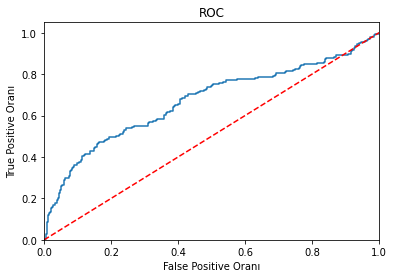

In [330]:
fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

False Pozitif (Type 1 Error) : iyi müşt demişim ama iyi müşt değillermiş
True Pozitif : Kötü müşteri değil demişim ve Kötü müşteri olmayanların oranı

In [331]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

In [332]:
# ROC un altında kalan alan
logit_roc_auc

0.4986413043478261

#### Test Split

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [334]:
loj = LogisticRegression(solver="liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(solver='liblinear')

In [335]:
y_test.shape

(404,)

In [ ]:
y_train.shape

In [338]:
y_pred = [ 1 if i>0.2 else 0 for i in y_probs]

In [ ]:
# confusion_matrix(y_train,y_test)

In [ ]:
accuracy_score(y_test, loj_model.predict(X_test))

In [343]:
y_pred = loj_model.predict(X_test)

In [344]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       369
           1       0.00      0.00      0.00        35

    accuracy                           0.91       404
   macro avg       0.46      0.50      0.48       404
weighted avg       0.83      0.91      0.87       404



##### Cross Validation

In [341]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.9183536585365856

#### R2 Score

In [345]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_pred,y_test))

0.2943359702216782